<h1 align="center" style="font-variant: small-caps;"> Machine Learning Term Project

<h3 align="center" style="font-variant: small-caps;"> Sept-Nov'24

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/survey-r/mxmh_survey_results.csv
/kaggle/input/proj-dataset/data


<h1 align="center" style="font-variant: small-caps;"> Rhythms of the Mind: Music as Therapy for Mental Well-being
<h3 align="center" style="font-variant: small-caps;"> Term Project Jul-Dec'24

<h2 align="center" style="font-variant: small-caps;"> Team Name: Bhattacharya Brothers
<h2 align="center" style="font-variant: small-caps;"> Name and ID of Member 1: Soham Bhattacharya B2430059
<h2 align="center" style="font-variant: small-caps;"> Name and ID of Member 2: Darpan Bhattacharya B2430044

# Table of Contents

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Set-up](#2)
    - [2.1 Importing Libraries](#2.1)
    - [2.2 Import Data](#2.2)
    - [2.3 Dataset Attributes](#2.3)
- [3. Exploratory Data Analysis (EDA)](#3)
    - [3.1 Descriptive Statistics](#3.1)
    - [3.2 Data Visualization](#3.2)
- [4. Data preprocessing](#4)
    - [4.1 Data Cleaning](#4.1)
    - [4.2 Data Imbalance Check](#4.2)
    - [4.3 Creating dummies](#4.3)
    - [4.4 Feature Selection](#4.4)
    - [4.5 Checking for outliers](#4.5)
    - [4.6 Inter Quartile Range (IQR)](#4.6)
    - [4.7 Dropping the outliers](#4.7)
    - [4.8 Feature Engineering](#4.8)
    - [4.9 Train-Test split](#4.9)
- [5. Correlation Analysis](#5)
- [6. Training Individual Models](#6)
    - [6.1 Logistic Regression](#6.1)
    - [6.2 Softmax Regression](#6.2)
    - [6.3 RandomForestClassifier](#6.3)
    - [6.4 Support Vector Machines](#6.4)
    - [6.5 XGBoost](#6.5)
    - [6.6 LightGBM](#6.6)
- [7. Model Selection](#7)
- [8. Voting Classifier with hard voting](#8)
    - [8.1 Classification report](#8.1)
    - [8.2 Confusion matrix](#8.2)
    - [8.3 K-Fold Cross-validation](#8.3)
- [9. Voting Classifier with soft voting](#9)
    - [9.1 Classification report](#9.1)
    - [9.2 Confusion matrix](#9.2)
    - [9.3 K-Fold Cross-validation](#9.3)
- [10. Result comparison](#10)

# 1. Introduction
<a id="1"></a>
Based on the music tastes and lifestyle of the person, does music improve/worsen respondent's mental health conditions? <br> Target variable : Music Effects

#### Jump to Table of Contents: [Table of Contents](#toc)

<a id="2"></a>
# 2. Set-up

#### Jump to Table of Contents: [Table of Contents](#toc)

<a id='2.1'></a>
## 2.1 Importing libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
import plotly.express as px
from collections import Counter

<a id='2.2'></a>
## 2.2 Import Data

In [3]:
# Loading a particular dataset
dataset = pd.read_csv('/kaggle/input/survey-r/mxmh_survey_results.csv')

<a id='2.3'></a>
## 2.3 Dataset Attributes

Dataset link: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results
- **Timestamp** : Date and time when form was submitted
- **Age** : Respondent's age
- **Primary streaming service** : Respondent's primary streaming service
- **Hours per day** : Number of hours the respondent listens to music per day
- **While working** : Does the respondent listen to music while studying/working?
- **Instrumentalist** : Does the respondent play an instrument regularly?
- **Composer** : Does the respondent compose music?
- **Fav genre** : Respondent's favorite or top genre
- **Exploratory** : Does the respondent actively explore new artists/genres?
- **Foreign languages** : Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- **BPM** : Beats per minute of favorite genre
- **Frequency** [**Classical**] : How frequently the respondent listens to classical music
- **Frequency** [**Country**] : How frequently the respondent listens to country music
- **Frequency** [**EDM**] : How frequently the respondent listens to EDM music
- **Frequency** [**Folk**] : How frequently the respondent listens to folks music
- **Frequency** [**Gospel**] : How frequently the respondent listens to Gospel music
- **Frequency** [**Hip hop**] : How frequently the respondent listens to hip hop music
- **Frequency** [**Jazz**] : How frequently the respondent listens to jazz music
- **Frequency** [**K pop**] : How frequently the respondent listens to K pop music
- **Frequency** [**Latin**] : How frequently the respondent listens to Latin music
- **Frequency** [**Lofi**] : How frequently the respondent listens to lofi music
- **Frequency** [**Metal**] : How frequently the respondent listens to metal music
- **Frequency** [**Pop**] : How frequently the respondent listens to pop music
- **Frequency** [**R&B**] : How frequently the respondent listens to R&B music
- **Frequency** [**Rap**] : How frequently the respondent listens to rap music
- **Frequency** [**Rock**] : How frequently the respondent listens to rock music
- **Frequency** [**Video Game Music**] : How frequently the respondent listens to video game music
- **Anxiety** : Self-reported anxiety, on a scale of 0-10
- **Depression** : Self-reported depression, on a scale of 0-10
- **Insomnia** : Self-reported insomnia, on a scale of 0-10
- **OCD** : Self-reported OCD, on a scale of 0-10
- **Music effects** : Does music improve/worsen respondent's mental health conditions?
- **Permissions** : Permissions to publicize data

In [4]:
# Checking the dimension of the dataset

dataset.shape

(736, 33)

In [5]:
# Display the first few rows of the dataset
dataset.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


<a id='3'></a>
# 3. Exploratory Data Analysis (EDA)

In [6]:
freq_cols = ['Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]']

to_be_deleted = []
for col in freq_cols:
    df = dataset[col].value_counts()
    if df['Never']>264:
        to_be_deleted+=[col]

In [7]:
print(to_be_deleted)
print(len(to_be_deleted))

['Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]']
7


In [8]:
to_be_deleted

['Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]']

<a id='3.1'></a>
## 3.1 Descriptive Statistics
Understanding the distribution of the data

#### Jump to Table of Contents: [Table of Contents](#toc)

In [9]:
# Checking for columns that are categorical features
dataset.select_dtypes(include=['object']).columns

Index(['Timestamp', 'Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Permissions'],
      dtype='object')

In [10]:
# Checking for columns that are numerical features
dataset.select_dtypes(include=['number']).columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [12]:
# Viewing the summary of numerical attributes

dataset.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [13]:
# Viewing the summary of categorical attributes

dataset.describe(include=['object'], exclude=['number'])

,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,736,735,733,732,735,736,736,732,736,736,...,736,736,736,736,736,736,736,736,728,736
unique,735,6,2,2,2,16,2,2,4,4,...,4,4,4,4,4,4,4,4,3,1
top,8/28/2022 16:15:08,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,2,458,579,497,609,188,525,404,259,343,...,443,280,264,277,225,215,330,236,542,736


<a id='3.2'></a>
## 3.2 Data Visualization
Histograms and bar charts or pie charts for categorical features.<br>
Box plots or scatter plots for continuous features.

#### Jump to Table of Contents: [Table of Contents](#toc)

### Feature: AGE

In [14]:
dataset.Age.describe()

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

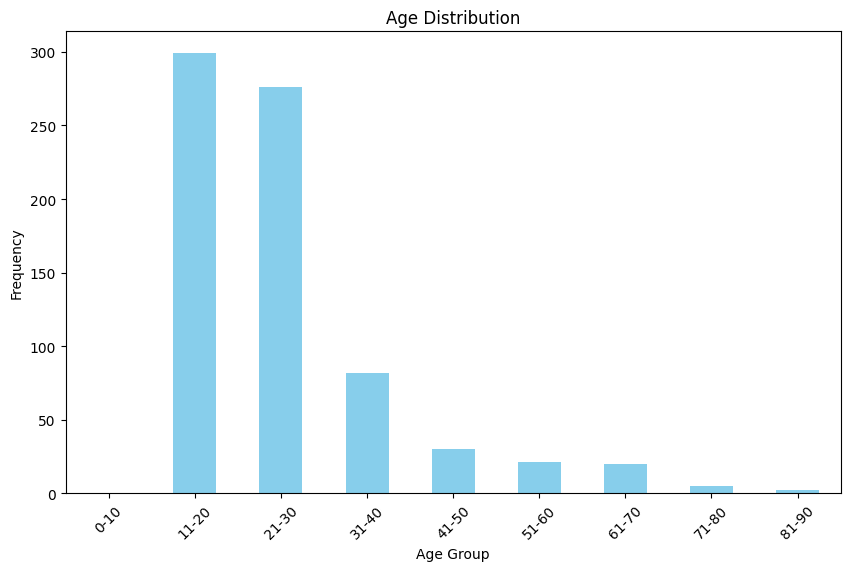

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for age categories
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column 'age_group' with the corresponding age bins
age_group = pd.cut(dataset.Age, bins=bins, labels=labels, right=False)

# Count the number of occurrences in each bin
age_counts = age_group.value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(10,6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Feature: PRIMARY STREAMING SERVICE

In [16]:
dataset['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

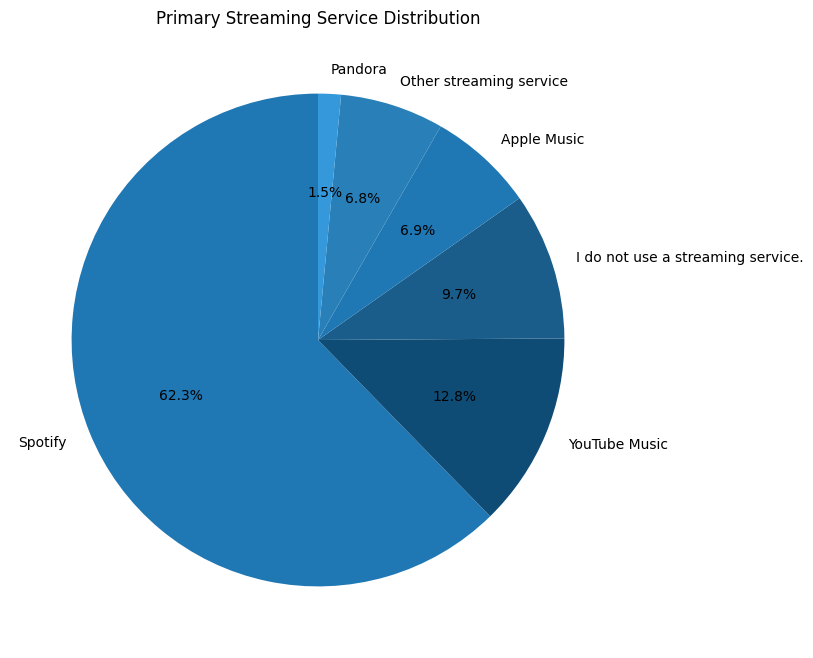

In [17]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    base_color,
    "#0f4c75",  # Dark blue (base shade)
    "#1a5d8b",
    "#1f77b4",  # Base blue
    "#2980b9",
    "#3498db",
    "#5fa3d1",
    "#7bb8e1",
    "#99c3e7",
    "#b3d0ed",  # Lighter blue
    "#d0e4f1"   # Very light blue
]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['Primary streaming service'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Primary Streaming Service Distribution')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

### Feature: NUMBER OF HOURS PER DAY

In [18]:
dataset['Hours per day'].describe()

count    736.000000
mean       3.572758
std        3.028199
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

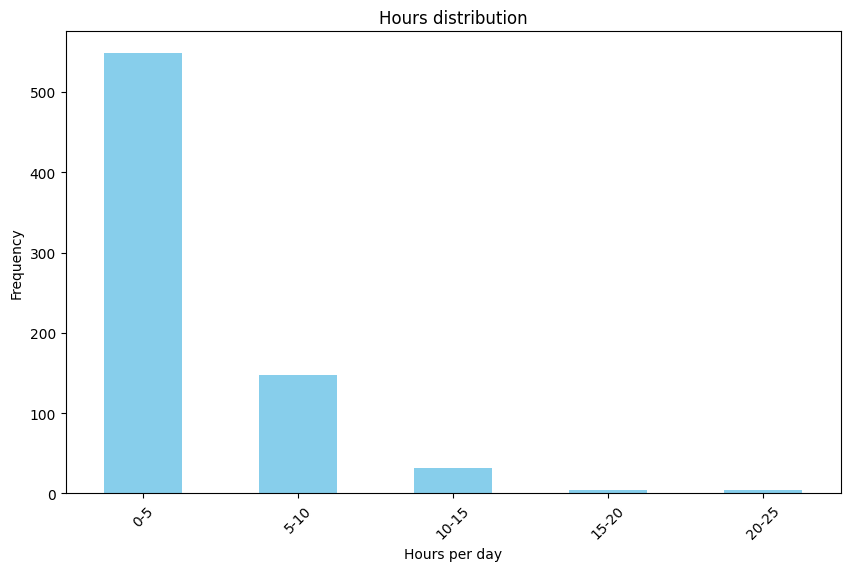

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for age categories
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25']

# Create a new column 'group' with the corresponding bins
group = pd.cut(dataset['Hours per day'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each bin
counts = group.value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(10,6))
counts.plot(kind='bar', color='skyblue')
plt.title('Hours distribution')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Feature: Listening to music WHILE WORKING

In [20]:
dataset['While working'].value_counts()

While working
Yes    579
No     154
Name: count, dtype: int64

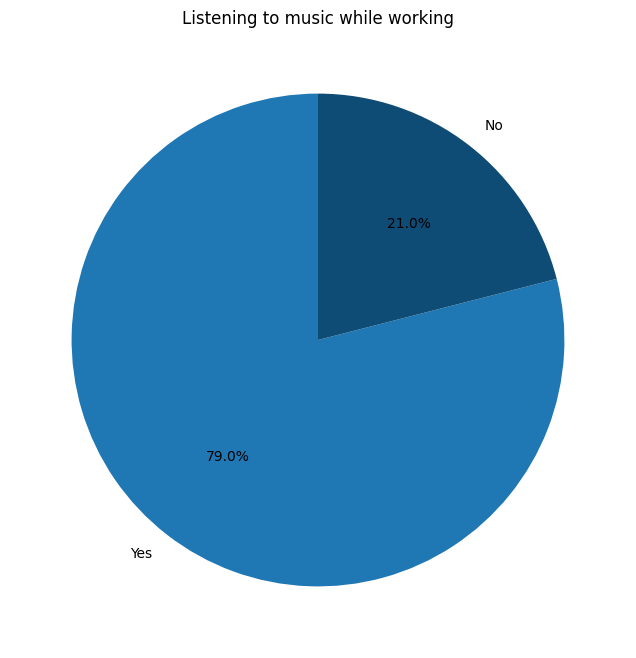

In [21]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    base_color,
    "#0f4c75",  # Dark blue (base shade)
    "#1a5d8b",
    "#1f77b4",  # Base blue
    "#2980b9",
    "#3498db",
    "#5fa3d1",
    "#7bb8e1",
    "#99c3e7",
    "#b3d0ed",  # Lighter blue
    "#d0e4f1"   # Very light blue
]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['While working'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Listening to music while working')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

### Features: INSTRUMENTALIST and COMPOSER

In [22]:
dataset.Instrumentalist.value_counts()

Instrumentalist
No     497
Yes    235
Name: count, dtype: int64

In [23]:
dataset.Composer.value_counts()

Composer
No     609
Yes    126
Name: count, dtype: int64

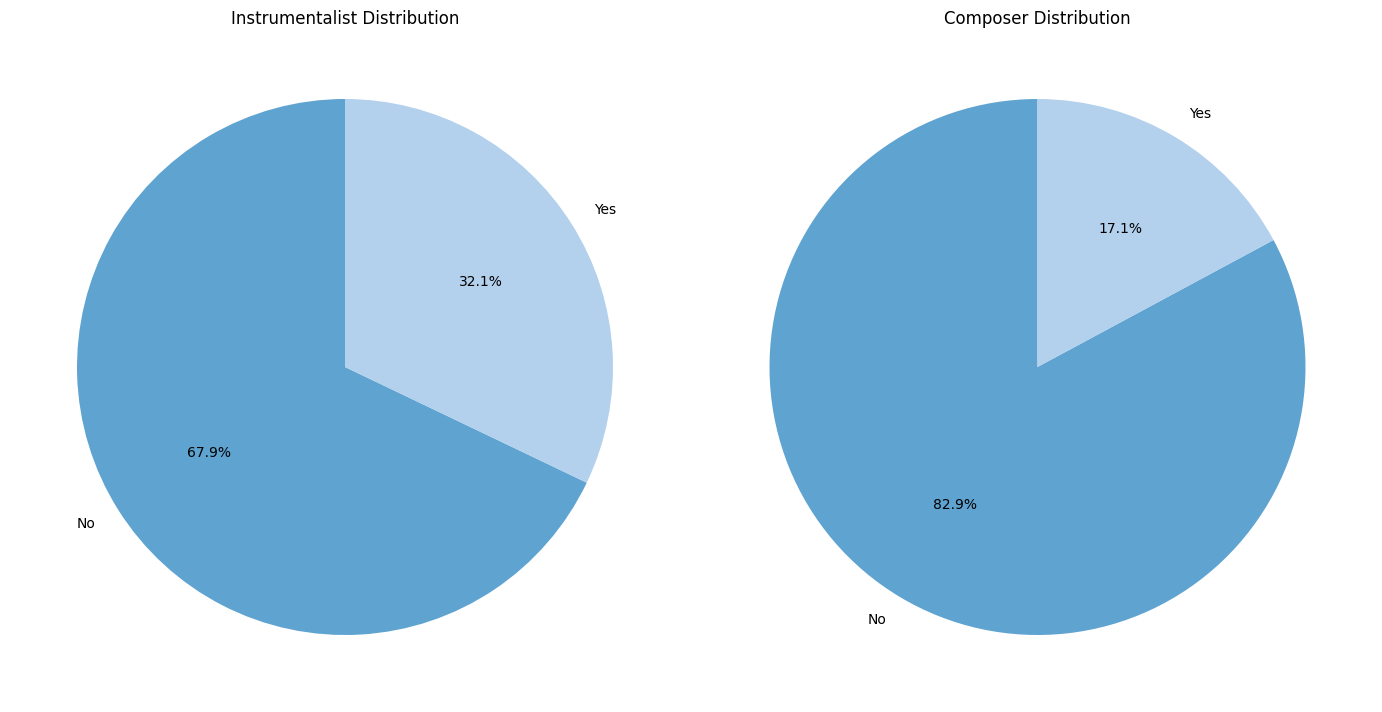

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category
instrumentalist_counts = dataset['Instrumentalist'].value_counts()
composer_counts = dataset['Composer'].value_counts()

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first pie chart (Instrumentalists)
ax[0].pie(instrumentalist_counts, labels=instrumentalist_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[0].set_title('Instrumentalist Distribution')

# Plot the second pie chart (Composer)
ax[1].pie(composer_counts, labels=composer_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[1].set_title('Composer Distribution')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Features: FAV GENRE

In [25]:
dataset['Fav genre'].value_counts(normalize=True)*100

Fav genre
Rock                25.543478
Pop                 15.489130
Metal               11.956522
Classical            7.201087
Video game music     5.978261
EDM                  5.027174
R&B                  4.755435
Hip hop              4.755435
Folk                 4.076087
K pop                3.532609
Country              3.396739
Rap                  2.989130
Jazz                 2.717391
Lofi                 1.358696
Gospel               0.815217
Latin                0.407609
Name: proportion, dtype: float64

### Features: EXPLORATORY and FOREIGN LANGUAGE

In [26]:
dataset.Exploratory.value_counts(normalize=True)*100

Exploratory
Yes    71.331522
No     28.668478
Name: proportion, dtype: float64

In [27]:
dataset['Foreign languages'].value_counts(normalize=True)*100

Foreign languages
Yes    55.191257
No     44.808743
Name: proportion, dtype: float64

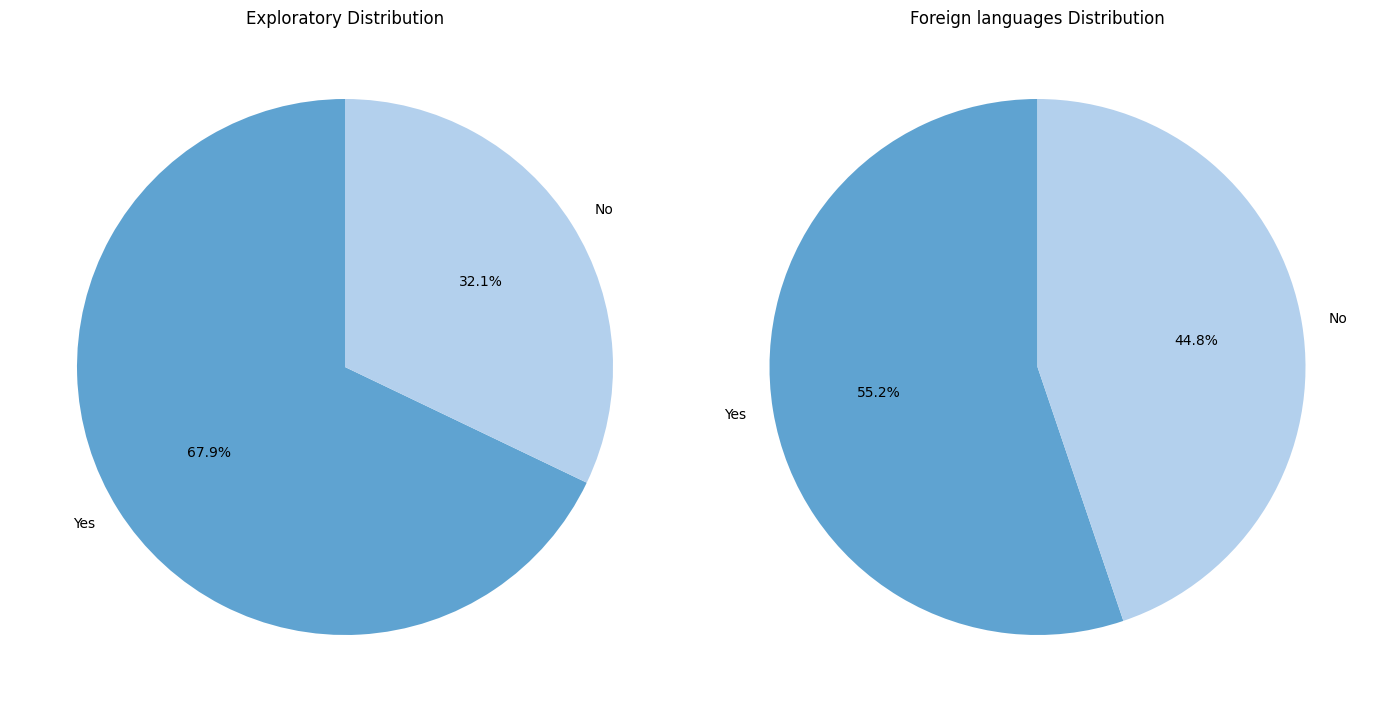

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each category
exploratory_counts = dataset['Exploratory'].value_counts()
foreign_counts = dataset['Foreign languages'].value_counts()

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first pie chart (Exploratory)
ax[0].pie(instrumentalist_counts, labels=exploratory_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[0].set_title('Exploratory Distribution')

# Plot the second pie chart (Foreign languages)
ax[1].pie(foreign_counts, labels=foreign_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5fa3d1","#b3d0ed"])
ax[1].set_title('Foreign languages Distribution')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Feature: FREQUENCIES of genres

In [29]:
dataset['Frequency [EDM]'].value_counts()

Frequency [EDM]
Never              307
Rarely             194
Sometimes          146
Very frequently     89
Name: count, dtype: int64

In [30]:
freq_options = ['Never','Rarely','Sometimes','Very frequently']

In [31]:
dataset.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [32]:
freq_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]']

In [33]:
freq_df = {
    'Never' : [],
    'Rarely' : [],
    'Sometimes' : [],
    'Very frequently' : []
}

In [34]:
for i in freq_columns:
    value_counts = dataset[i].value_counts()
    freq_df['Never']+=[value_counts['Never']]
    freq_df['Rarely']+=[value_counts['Rarely']]
    freq_df['Sometimes']+=[value_counts['Sometimes']]
    freq_df['Very frequently']+=[value_counts['Very frequently']]

In [35]:
freq_df = pd.DataFrame(freq_df, index=freq_columns)

In [36]:
freq_df

,Never,Rarely,Sometimes,Very frequently
Frequency [Classical],169,259,200,108
Frequency [Country],343,233,111,49
Frequency [EDM],307,194,146,89
Frequency [Folk],292,221,145,78
Frequency [Gospel],535,135,52,14
Frequency [Hip hop],181,214,218,123
Frequency [Jazz],261,247,175,53
Frequency [K pop],416,176,67,77
Frequency [Latin],443,172,88,33
Frequency [Lofi],280,211,160,85


### Features: ANXIETY, DEPRESSION, OCD and INSOMNIA

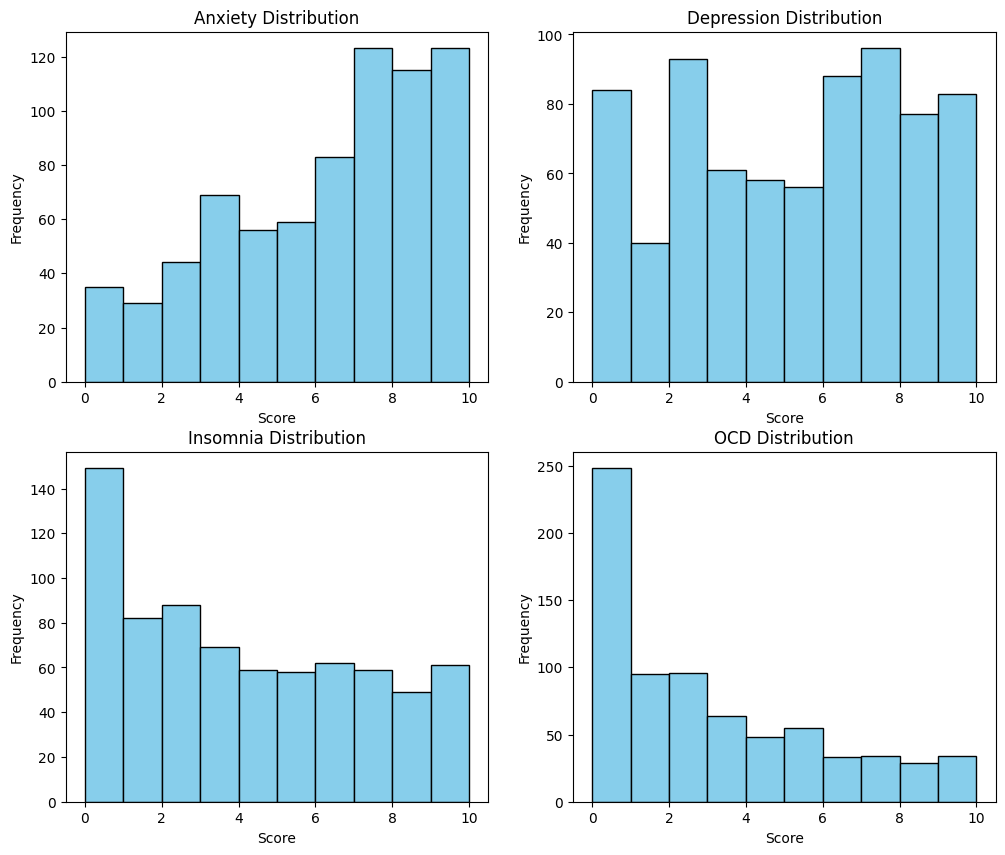

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2,figsize=(12,10))
axes = axes.flatten()

columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Plot each histogram in a separate subplot
for i, column in enumerate(columns):
    axes[i].hist(dataset[column], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')

# plt.tight_layout()

plt.show()

### Feature: MUSIC EFFECTS

In [38]:
dataset['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

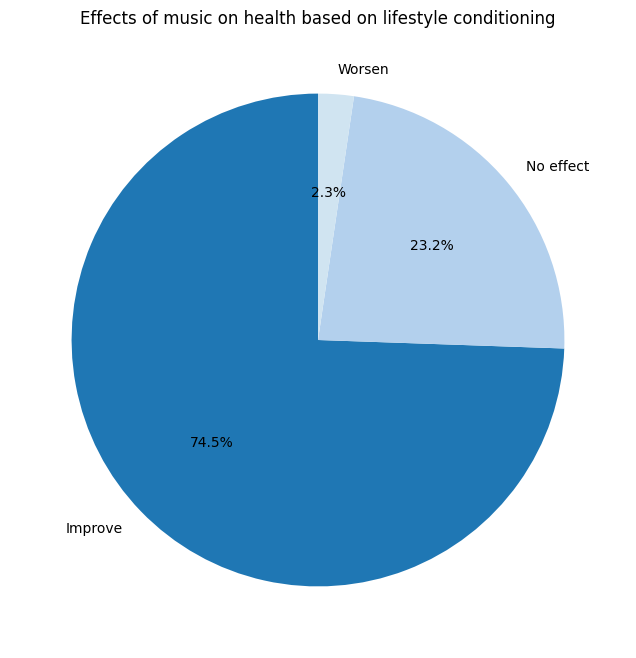

In [39]:
import matplotlib.pyplot as plt


# Define a color palette with shades of blue
base_color = "#1f77b4"  # Base color (blue)
colors = [
    "#1f77b4",  # Base blue
    "#b3d0ed",
    "#d0e4f1"]
# Plot the pie chart
plt.figure(figsize=(8, 8))
dataset['Music effects'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Effects of music on health based on lifestyle conditioning')
plt.ylabel('')  # Hide the ylabel (it's not necessary for a pie chart)
plt.show()

<a id='4'></a>
# 4. Data Preprocessing

#### Jump to Table of Contents: [Table of Contents](#toc)

<a id='4.1'></a>
## 4.1 Data Cleaning

#### Jump to Table of Contents: [Table of Contents](#toc)

In [40]:
print('NANs')
dataset.isnull().sum()

NANs


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Since we see that there a lot of missing values, we should remove those entries from the dataset.

In [41]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)

In [42]:
dataset.head()

,index,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [43]:
# Total number of missing values in the dataset
dataset.isnull().sum().sum()

0

In [44]:
dataset.shape

(616, 34)

<a id='4.2'></a>
## 4.2 Data Imbalance Check

#### Jump to Table of Contents: [Table of Contents](#toc)

In [45]:
dataset['Music effects'].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [46]:
labels=["Worsen","Improve", "No effect"]

improved_or_not = dataset['Music effects'].value_counts().tolist()
values = [improved_or_not[0], improved_or_not[1], improved_or_not[2]]

fig = px.pie(values=dataset['Music effects'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black","lightgreen"]
             ,title="Improve vs Worsen vs No effect")
fig.show()

# from IPython.display import display
# display(fig)

<a id='4.3'></a>
## 4.3 Creating dummies

#### Jump to Table of Contents: [Table of Contents](#toc)

In [47]:
# We shall keep the original dataset intact, and work with a clone version of it
dataset1 = dataset.copy()

In [48]:
dataset1.columns

Index(['index', 'Timestamp', 'Age', 'Primary streaming service',
       'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects', 'Permissions'],
      dtype='object')

<a id='4.4'></a>
## 4.4 Feature Selection

#### Jump to Table of Contents: [Table of Contents](#toc)

In [49]:
to_be_deleted

['Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]']

In [50]:
delete_cols = ['Permissions','index','Timestamp', 'Primary streaming service'] + to_be_deleted

# Dropping those columns which are do not significantly contribute to the purpose
dataset1.drop(columns=delete_cols, inplace=True)

In [51]:
dataset1.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

<a id='4.5'></a>
## 4.5 Checking for outliers

#### Jump to Table of Contents: [Table of Contents](#toc)

In [52]:
categorical_columns = dataset1.select_dtypes(include=['object']).columns
numerical_columns = dataset1.select_dtypes(include=['number']).columns

In [53]:
numerical_columns

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD'],
      dtype='object')

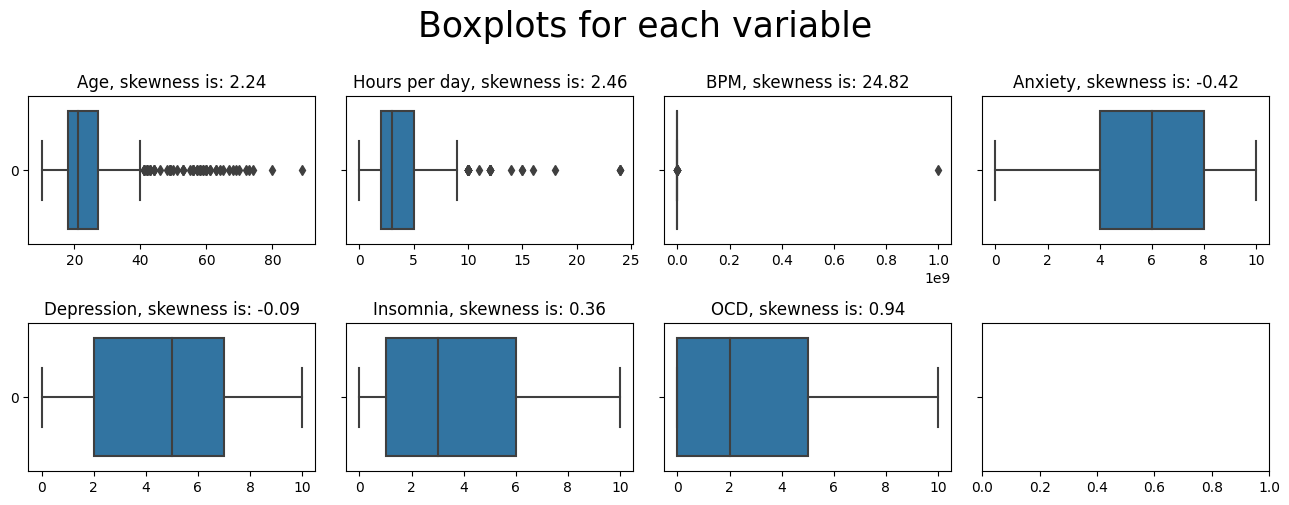

In [54]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=dataset1, columns_list=numerical_columns, rows=2, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

Ignore the last boxplot. It denotes no variable. It got added in order to fit the dimensions of the plots given. 

<a id='4.6'></a>
## 4.6 Inter Quartile Range (IQR)

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.


#### Jump to Table of Contents: [Table of Contents](#toc)

In [55]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

<a id='4.7'></a>
## 4.7 Dropping the outliers

#### Jump to Table of Contents: [Table of Contents](#toc)

In [56]:
# detecting outliers
Outliers_IQR = IQR_method(dataset1,1,numerical_columns)

# dropping outliers
df = dataset1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


<a id='4.8'></a>
## 4.8 Feature Engineering

#### Jump to Table of Contents: [Table of Contents](#toc)

<a id='4.8.1'></a>
### 4.8.1 Feature Encoding

After using label encoder, we have all categorical features in number format. Then in all, we have all features in number format. what shall we do now to solve a classification problem using this dataset

Encoding to be done:
- **While working**, **Instrumentalist**, **Composer**, **Exploratory**, **Foreign languages** : [Yes-> 1, No-> 0]
- **Frequency [Genre]** : ['Never'->0, 'Sometimes'->1, 'Rarely'->2, 'Very frequently'->3]
- **Music effects** : ['Worsen'->0, 'No effect'->1, 'Improve'->2]

In [57]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [58]:
# Highlighting the Target Column by changing the name of the column to 'Target'
dataset1.rename(columns={'Music effects':'Target'}, inplace=True)

In [59]:
dataset1.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target'],
      dtype='object')

In [60]:
columns_labelenc = ['While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages',]

In [61]:
columns_ordenc = ['Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

In [62]:
labelenc = LabelEncoder()
ordenc = OrdinalEncoder(categories=[['Never', 'Sometimes', 'Rarely', 'Very frequently']]*len(columns_ordenc))
targetenc = OrdinalEncoder(categories=[['Worsen', 'No effect', 'Improve']])

In [63]:
dataset1[columns_labelenc] = dataset1[columns_labelenc].apply(labelenc.fit_transform)

In [64]:
dataset1[columns_ordenc] = pd.DataFrame(ordenc.fit_transform(dataset1[columns_ordenc]),columns=columns_ordenc)

In [65]:
dataset1['Target'] = pd.DataFrame(targetenc.fit_transform(dataset1['Target'].values.reshape(-1,1)),columns=['Target'])

In [66]:
dataset1.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target
0,18.0,4.0,0,0,0,15,0,1,132.0,0.0,...,2.0,0.0,2.0,2.0,3.0,7.0,7.0,10.0,2.0,1.0
1,61.0,2.5,1,0,1,6,1,1,84.0,1.0,...,1.0,1.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,2.0
2,18.0,4.0,1,0,0,12,1,0,107.0,0.0,...,1.0,3.0,3.0,0.0,2.0,7.0,2.0,5.0,9.0,2.0
3,18.0,5.0,1,1,1,6,1,1,86.0,2.0,...,3.0,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,2.0
4,18.0,3.0,1,1,0,15,1,1,66.0,1.0,...,2.0,2.0,0.0,0.0,1.0,4.0,8.0,6.0,0.0,2.0


In [67]:
dataset1.Target.value_counts()

Target
2.0    465
1.0    136
0.0     15
Name: count, dtype: int64

In [68]:
dataset['Music effects'].value_counts()

Music effects
Improve      465
No effect    136
Worsen        15
Name: count, dtype: int64

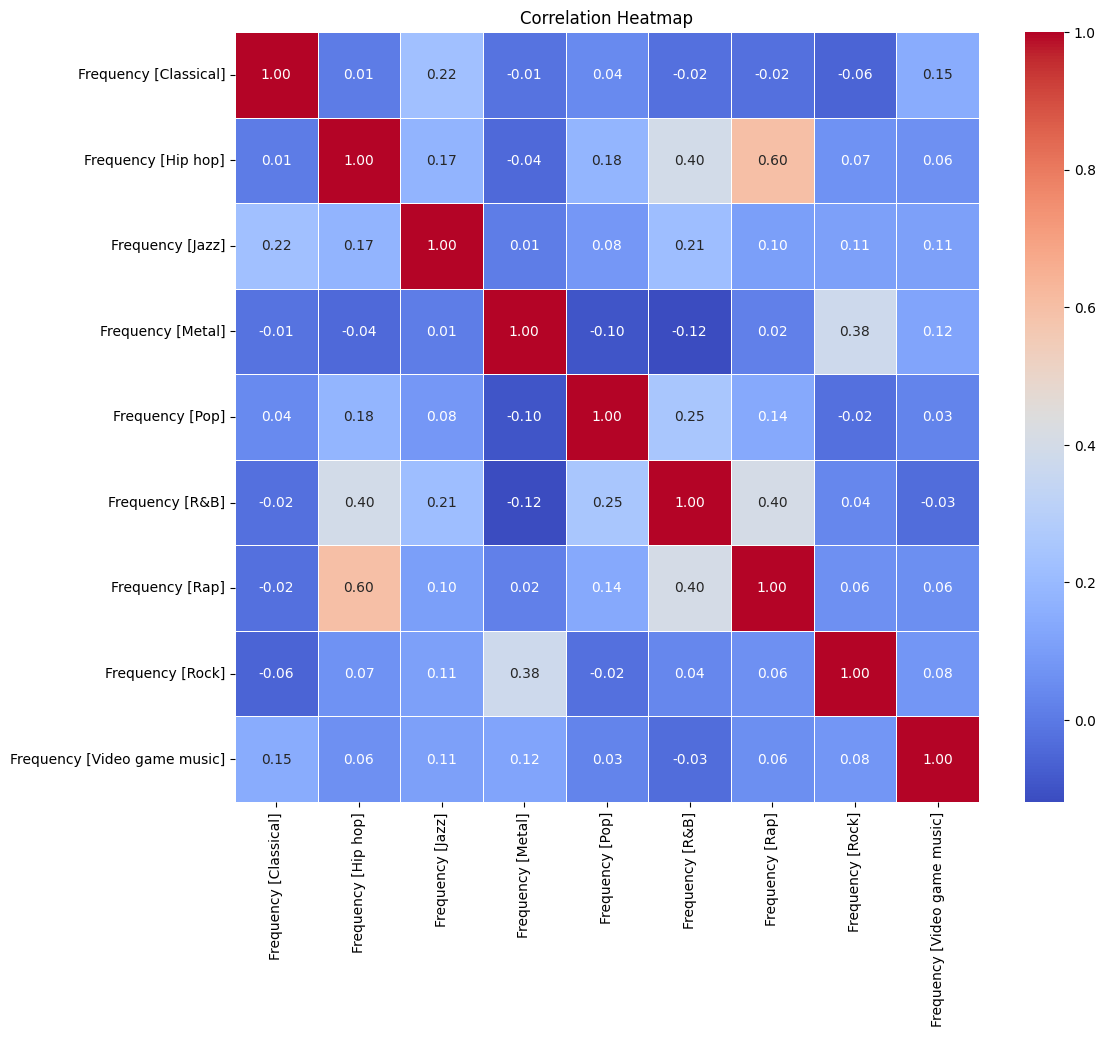

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = columns_ordenc

# Calculate the correlation matrix
corr_matrix = dataset1[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<a id='4.8.2'></a>
### 4.8.2 Feature Scaling

In [70]:
(dataset1.BPM==999999999).sum()

1

In [71]:
dataset1[dataset1['BPM'] == 999999999].index

Index([471], dtype='int64')

In [72]:
dataset1.drop(index=[471], inplace=True)
dataset.reset_index(inplace=True)

In [73]:
cols = dataset1.columns
minMax = {
    'min' : [],
    'max' : []
}

for col in cols:
    minMax['min']+=[dataset1[col].min()]
    minMax['max']+=[dataset1[col].max()]

minMax = pd.DataFrame(minMax, index=cols)
print(minMax)

                               min    max
Age                           10.0   89.0
Hours per day                  0.0   24.0
While working                  0.0    1.0
Instrumentalist                0.0    1.0
Composer                       0.0    1.0
Fav genre                      0.0   15.0
Exploratory                    0.0    1.0
Foreign languages              0.0    1.0
BPM                            0.0  624.0
Frequency [Classical]          0.0    3.0
Frequency [Hip hop]            0.0    3.0
Frequency [Jazz]               0.0    3.0
Frequency [Metal]              0.0    3.0
Frequency [Pop]                0.0    3.0
Frequency [R&B]                0.0    3.0
Frequency [Rap]                0.0    3.0
Frequency [Rock]               0.0    3.0
Frequency [Video game music]   0.0    3.0
Anxiety                        0.0   10.0
Depression                     0.0   10.0
Insomnia                       0.0   10.0
OCD                            0.0   10.0
Target                         0.0

In [74]:
cols = list(dataset1.columns)
cols.remove('Target')

In [75]:
dataset1.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target'],
      dtype='object')

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale
columns_to_scale = cols

# Apply MinMaxScaler to selected columns
dataset1[columns_to_scale] = scaler.fit_transform(dataset1[columns_to_scale])

In [77]:
dataset1.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Target
0,0.101266,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.211538,0.000000,...,0.666667,0.000000,0.666667,0.666667,1.000000,0.7,0.7,1.0,0.2,1.0
1,0.645570,0.104167,1.0,0.0,1.0,0.4,1.0,1.0,0.134615,0.333333,...,0.333333,0.333333,0.000000,0.000000,0.000000,0.9,0.7,0.3,0.3,2.0
2,0.101266,0.166667,1.0,0.0,0.0,0.8,1.0,0.0,0.171474,0.000000,...,0.333333,1.000000,1.000000,0.000000,0.666667,0.7,0.2,0.5,0.9,2.0
3,0.101266,0.208333,1.0,1.0,1.0,0.4,1.0,1.0,0.137821,0.666667,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.8,0.8,0.7,0.7,2.0
4,0.101266,0.125000,1.0,1.0,0.0,1.0,1.0,1.0,0.105769,0.333333,...,0.666667,0.666667,0.000000,0.000000,0.333333,0.4,0.8,0.6,0.0,2.0


<a id='4.9'></a>
## 4.9 Train-Test split
Divide the data into training and test sets, typically using an 80/20 or 70/30 split, ensuring that the data is stratified (if using binary classification) so that both healthy and unhealthy classes are represented proportionally in both sets.

#### Jump to Table of Contents: [Table of Contents](#toc)

In [78]:
from sklearn.model_selection import train_test_split

X = dataset1.drop(columns=['Target'])
y = dataset1['Target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # For 80/20 split (use 0.3 for 70/30 split)
    stratify=y,     # Ensure stratification of the target labels
    random_state=42  # Set a random seed for reproducibility
)

In [80]:
print("Class distribution in original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in original dataset:
Target
2.0    0.756098
1.0    0.219512
0.0    0.024390
Name: proportion, dtype: float64

Class distribution in training set:
Target
2.0    0.755814
1.0    0.218605
0.0    0.025581
Name: proportion, dtype: float64

Class distribution in test set:
Target
2.0    0.756757
1.0    0.221622
0.0    0.021622
Name: proportion, dtype: float64


Use Cross-validation and Hyperparameter Tuning for each model being trained

<a id='5'></a>
# 5. Correlation Analysis
Identifying how lifestyle factors and music genres correlate with the health condition using heatmaps or pairplots.

#### Jump to Table of Contents: [Table of Contents](#toc)

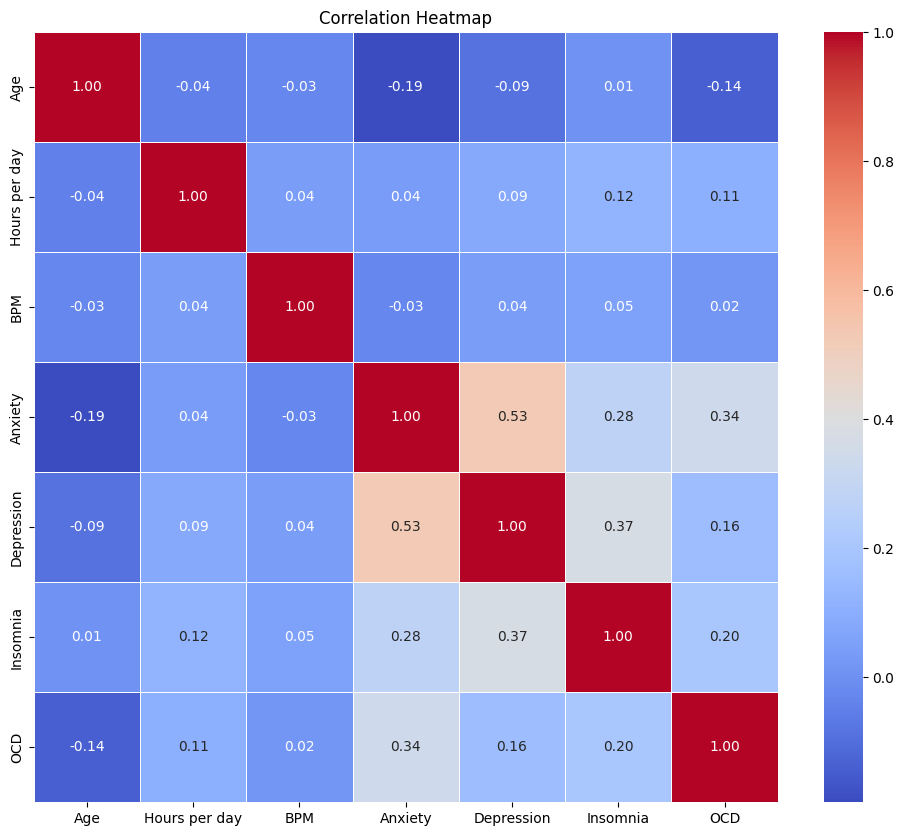

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = ['Age', 'Hours per day', 'BPM','Anxiety', 'Depression', 'Insomnia', 'OCD']

# Calculate the correlation matrix
corr_matrix = dataset[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Showing the correlation of 'Health conditions' (the target variable) with the features ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target']

In [82]:
dataset1.columns

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target'],
      dtype='object')

Age             -0.061141
Hours per day    0.044163
BPM              0.010772
Anxiety          0.119542
Depression      -0.006846
Insomnia        -0.005220
OCD              0.053335
Target                NaN
Name: Target, dtype: float64


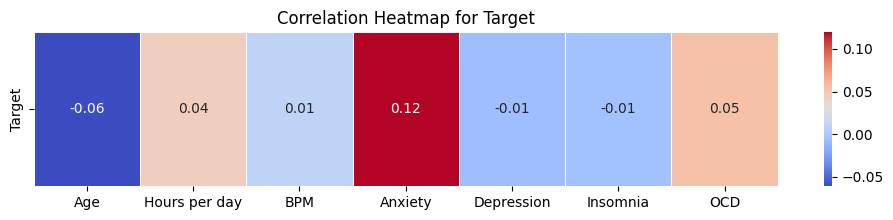

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Target']

# Calculate the correlation matrix
corr_matrix = dataset1[numeric_features].corr()

# Select a specific column (replace 'feature_name' with your chosen column)
column_name = 'Target'  # Replace with the column name you want
selected_column = corr_matrix[column_name]

# Remove the correlation with itself (set it to NaN)
selected_column[column_name] = float('nan')

# Print the selected column without the self-correlation
print(selected_column)

# Plot the heatmap for the selected column
plt.figure(figsize=(12, 2))  # Adjust the width of the plot
sns.heatmap(selected_column.to_frame()[:-1].T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap for {column_name}')
plt.show()

Frequency [Classical]          -0.010158
Frequency [Hip hop]             0.031323
Frequency [Jazz]                0.051871
Frequency [Metal]              -0.028796
Frequency [Pop]                 0.023465
Frequency [R&B]                 0.049417
Frequency [Rap]                 0.030521
Frequency [Rock]                0.020055
Frequency [Video game music]   -0.034622
Target                               NaN
Name: Target, dtype: float64


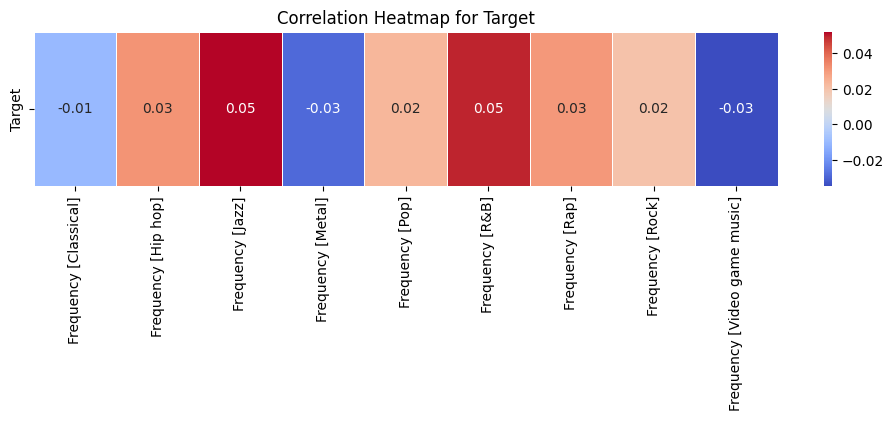

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation analysis
numeric_features = ['Frequency [Classical]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Target']

# Calculate the correlation matrix
corr_matrix = dataset1[numeric_features].corr()

# Select a specific column (replace 'feature_name' with your chosen column)
column_name = 'Target'  # Replace with the column name you want
selected_column = corr_matrix[column_name]

# Remove the correlation with itself (set it to NaN)
selected_column[column_name] = float('nan')

# Print the selected column without the self-correlation
print(selected_column)

# Plot the heatmap for the selected column
plt.figure(figsize=(12, 2))  # Adjust the width of the plot
sns.heatmap(selected_column.to_frame()[:-1].T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap for {column_name}')
plt.show()

<a id='6'></a>
# 6. Training Individual Models
Baseline starting Model : Logistic Regression <br>
Other models that are planned to be trained : RandomForest, Gradient Boosting Machines, XGBoost, LightGBM, Support Vector Machines (SVM)<br><br>

#### Jump to Table of Contents: [Table of Contents](#toc)

In [85]:
training_models = []
accuracy_list = []
tr_accuracy_list = []

Consider 'With hyperparameter tuning' as 'w hpt' and 'Without hyperparameter tuning' as 'w/o hpt'

<a id='6.1'></a>
## 6.1 Logistic Regression

#### Jump to Table of Contents: [Table of Contents](#toc)

#### With Hyperparameter Tuning

In [86]:
training_models+=['Logistic Regression w hpt']

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Type of regularization
    'solver': ['liblinear', 'lbfgs'],  # Solver to use
    'l1_ratio': [0.0, 0.5, 1.0] # only for elasticnet solver
}

# Instantiate the model
logreg = LogisticRegression(class_weight='balanced',random_state=42)

# Instantiate RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
rand_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'l1_ratio': [0.0, 0.5, 1.0],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   scoring='accuracy')

In [88]:
# Use the best model to make predictions
y_pred = rand_search.best_estimator_.predict(X_test)
y_pred_tr = rand_search.best_estimator_.predict(X_train)
# Get the best hyperparameters
print("Best hyperparameters found:", rand_search.best_params_)

# Evaluate the model
from sklearn.metrics import accuracy_score
acc_lr1 = accuracy_score(y_test, y_pred)
tr_acc_lr1 = accuracy_score(y_train, y_pred_tr)
print(f"Training accuracy:{tr_acc_lr1:.6f}")
print(f"Accuracy of tuned model: {acc_lr1:.6f}")

Best hyperparameters found: {'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.5, 'C': 0.01}
Training accuracy:0.755814
Accuracy of tuned model: 0.756757


In [89]:
accuracy_list += [acc_lr1]
tr_accuracy_list += [tr_acc_lr1]

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

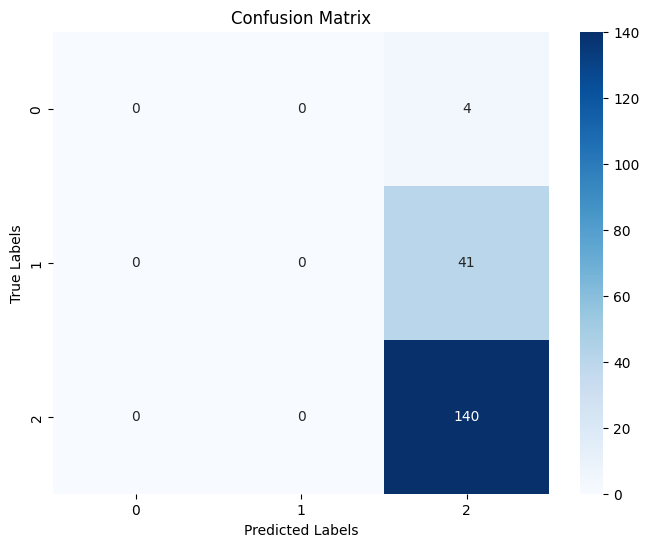

In [91]:
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### Without Hyperparameter tuning

In [92]:
training_models+=['Logistic Regression w/o hpt']

In [93]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs',random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy (using training set): {accuracy:.6f}")

acc_lr2 = accuracy_score(y_test, y_pred)
print(f"Accuracy (using test set): {acc_lr2:.6f}")

Accuracy (using training set): 0.765116
Accuracy (using test set): 0.767568


In [95]:
accuracy_list+=[acc_lr2]
tr_accuracy_list += [accuracy]

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.57      0.10      0.17        41
         2.0       0.78      0.99      0.87       140

    accuracy                           0.77       185
   macro avg       0.45      0.36      0.34       185
weighted avg       0.71      0.77      0.69       185



Text(0.5, 1.0, 'Confusion Matrix')

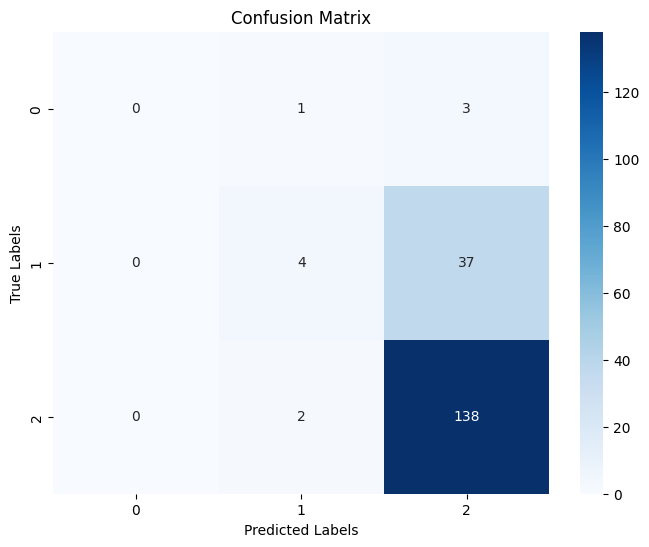

In [97]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='6.2'></a>
## 6.2 Softmax Regression

#### Jump to Table of Contents: [Table of Contents](#toc)

In [98]:
training_models+=['Softmax Regression']

In [99]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=42)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy (using training set): {accuracy:.6f}")

acc_lr2 = accuracy_score(y_test, y_pred)
print(f"Accuracy (using test set): {acc_lr2:.6f}")

Accuracy (using training set): 0.765116
Accuracy (using test set): 0.767568


In [101]:
accuracy_list+=[acc_lr2]
tr_accuracy_list += [accuracy]

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.57      0.10      0.17        41
         2.0       0.78      0.99      0.87       140

    accuracy                           0.77       185
   macro avg       0.45      0.36      0.34       185
weighted avg       0.71      0.77      0.69       185



Text(0.5, 1.0, 'Confusion Matrix')

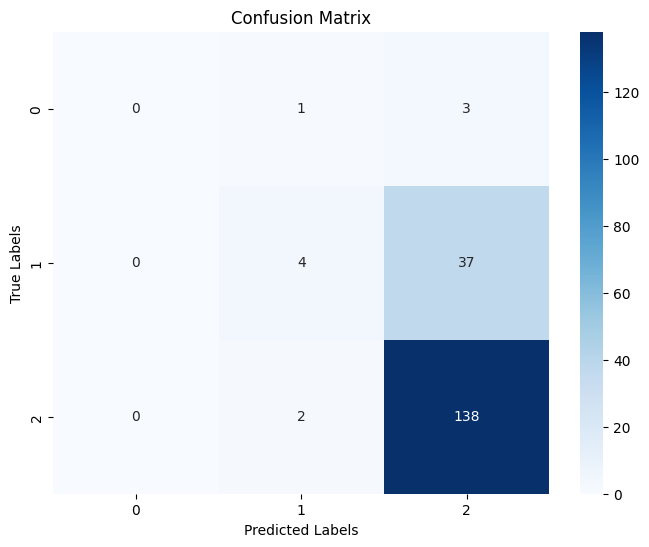

In [103]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='6.3'></a>
## 6.3 RandomForestClassifier

#### Jump to Table of Contents: [Table of Contents](#toc)

#### With Hyperparameter Tuning

In [104]:
training_models+=['RandomForest w hpt']

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Instantiate RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [106]:
# Use the best model to make predictions
y_pred = rand_search.best_estimator_.predict(X_test)
y_train_pred = rand_search.best_estimator_.predict(X_train)

# Get the best hyperparameters
print("Best hyperparameters found:", rand_search.best_params_)

# Evaluate the model
from sklearn.metrics import accuracy_score
acc_rf1 = accuracy_score(y_test, y_pred)
tr_acc_rf1 = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {tr_acc_rf1:.6f}")
print(f"Accuracy of tuned model: {acc_rf1:.6f}")

Best hyperparameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Training accuracy: 1.000000
Accuracy of tuned model: 0.756757


In [107]:
accuracy_list += [acc_rf1]
tr_accuracy_list += [tr_acc_rf1]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

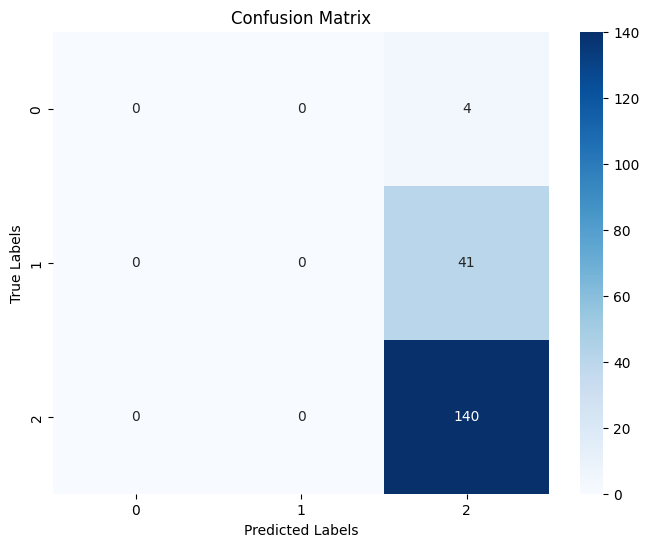

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### Without hyperparameter tuning

In [109]:
training_models+=['RandomForest w/o hpt']

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Use the best model to make predictions
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
# Evaluate the model
from sklearn.metrics import accuracy_score
acc_rf2 = accuracy_score(y_test, y_pred)
tr_acc_rf2 = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of model: {acc_rf2:.4f}")

Accuracy of model: 0.7351


In [112]:
accuracy_list += [acc_rf2]
tr_accuracy_list += [tr_acc_rf2]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.12      0.02      0.04        41
         2.0       0.76      0.96      0.85       140

    accuracy                           0.74       185
   macro avg       0.30      0.33      0.30       185
weighted avg       0.60      0.74      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

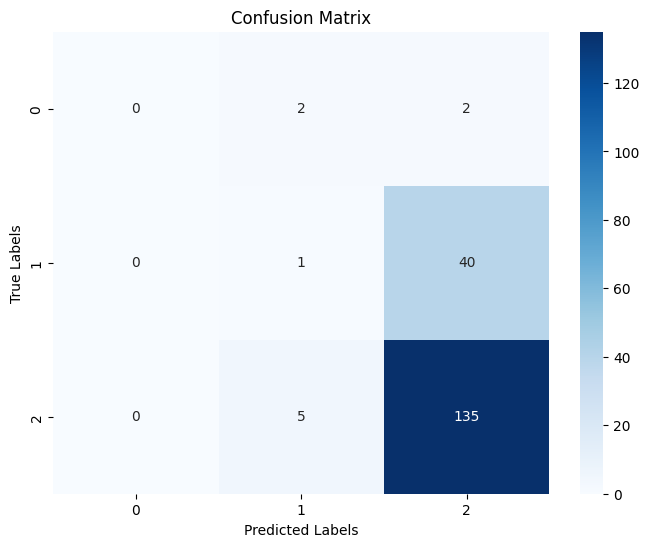

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='6.4'></a>
## 6.4 Support Vector Machines

#### Jump to Table of Contents: [Table of Contents](#toc)

#### With hyperparameter tuning

In [114]:
training_models += ['SVM w hpt']

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # SVM kernel types
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (relevant for 'poly' kernel)
    'tol': [1e-4, 1e-3],  # Tolerance for stopping criterion
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=linear, tol=0.001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, tol=0.0001; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, tol=0.0001; total time=   0.0s
[CV] END C=

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'tol': [0.0001, 0.001]},
             verbose=2)

In [116]:
# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Step 5: Evaluate the model using the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
y_train_pred = best_svm.predict(X_train)

acc_svm1 = accuracy_score(y_test, y_pred)
tr_acc_svm1 = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {acc_svm1}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best parameters: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.0001}
Accuracy: 0.7567567567567568
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



In [117]:
accuracy_list+=[acc_svm1]
tr_accuracy_list+=[tr_acc_svm1]

Text(0.5, 1.0, 'Confusion Matrix')

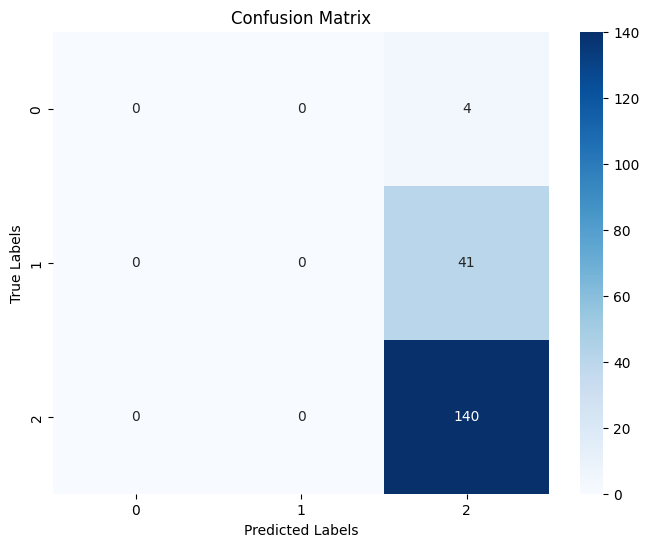

In [118]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### Without hyperparameter tuning

In [119]:
training_models += ['SVM w/o hpt']

In [120]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [121]:
y_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

acc_svm2 = accuracy_score(y_test, y_pred)
tr_acc_svm2 = accuracy_score(y_train, y_train_pred)

print(f"Accuracy: {acc_svm2}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7567567567567568
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00        41
         2.0       0.76      1.00      0.86       140

    accuracy                           0.76       185
   macro avg       0.25      0.33      0.29       185
weighted avg       0.57      0.76      0.65       185



In [122]:
accuracy_list+=[acc_svm2]
tr_accuracy_list+=[tr_acc_svm2]

Text(0.5, 1.0, 'Confusion Matrix')

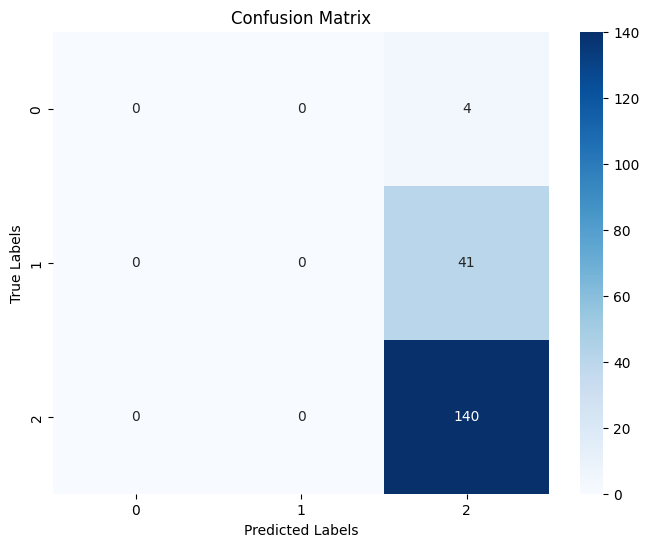

In [123]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='6.5'></a>
## 6.5 XGBoost

#### Jump to Table of Contents: [Table of Contents](#toc)

In [124]:
# Remove any special characters (replace with underscores or remove them)
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

#### Without Hyperparameter tuning

In [125]:
training_models+=['XGBoost w/o hpt']

In [126]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification (use 'multi:softprob' for probabilities)
    num_class=3,  # Number of classes (for Iris dataset, it's 3)
    max_depth=5,  # Maximum depth of the trees
    learning_rate=0.1,  # Step size to update the weights
    n_estimators=100,  # Number of boosting rounds (trees)
    eval_metric='mlogloss',  # Metric for multiclass classification
    subsample=0.8,  # Fraction of data used for each tree (for regularization)
    colsample_bytree=0.8,  # Fraction of features used for each tree
    verbosity=1  # Show training process (0 = silent, 1 = some messages)
)

# Train the XGBoost model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [127]:
# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
acc_xgb1 = accuracy_score(y_test, y_pred)
tr_acc_xgb1 = accuracy_score(y_train, y_train_pred)

print(f"Accuracy: {acc_xgb1}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.745945945945946
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.25      0.05      0.08        41
         2.0       0.77      0.97      0.86       140

    accuracy                           0.75       185
   macro avg       0.34      0.34      0.31       185
weighted avg       0.64      0.75      0.67       185



In [128]:
accuracy_list+=[acc_xgb1]
tr_accuracy_list+=[tr_acc_xgb1]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.25      0.05      0.08        41
         2.0       0.77      0.97      0.86       140

    accuracy                           0.75       185
   macro avg       0.34      0.34      0.31       185
weighted avg       0.64      0.75      0.67       185



Text(0.5, 1.0, 'Confusion Matrix')

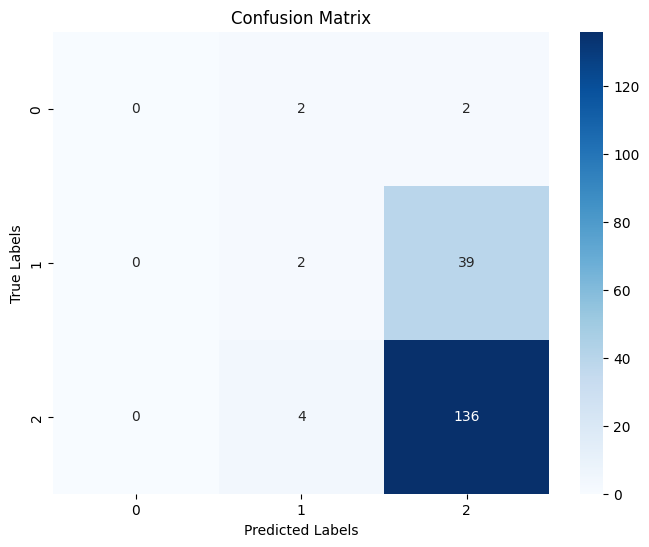

In [129]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

#### With hyperparameter tuning

In [130]:
training_models+=['XGBoost w hpt']

In [131]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_dept

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [132]:
# Get best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Evaluate performance
acc_xgb2 = accuracy_score(y_test, y_pred)
tr_acc_xgb2 = accuracy_score(y_train, y_train_pred)

print(f"Accuracy: {acc_xgb2}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.7351351351351352
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.14      0.02      0.04        41
         2.0       0.76      0.96      0.85       140

    accuracy                           0.74       185
   macro avg       0.30      0.33      0.30       185
weighted avg       0.61      0.74      0.65       185



In [133]:
accuracy_list+=[acc_xgb2]
tr_accuracy_list+=[tr_acc_xgb2]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.14      0.02      0.04        41
         2.0       0.76      0.96      0.85       140

    accuracy                           0.74       185
   macro avg       0.30      0.33      0.30       185
weighted avg       0.61      0.74      0.65       185



Text(0.5, 1.0, 'Confusion Matrix')

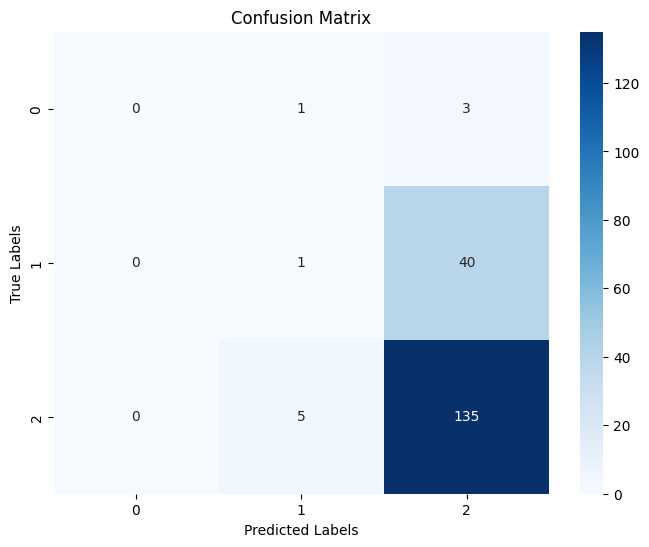

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='6.6'></a>
## 6.6 LightGBM

#### Jump to Table of Contents: [Table of Contents](#toc)

In [135]:
training_models +=['LightGBM']

In [136]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 430, number of used features: 22
[LightGBM] [Info] Start training from score -3.665890
[LightGBM] [Info] Start training from score -1.520490
[LightGBM] [Info] Start training from score -0.279960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier()

In [137]:
# Use the best model to make predictions
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
acc_lgbm1 = accuracy_score(y_test, y_pred)
tr_acc_lgbm1 = accuracy_score(y_train, y_train_pred)

print(f"Accuracy of model: {acc_lgbm1:.4f}")

Accuracy of model: 0.7514


In [138]:
accuracy_list+=[acc_lgbm1]
tr_accuracy_list+=[tr_acc_lgbm1]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.38      0.12      0.19        41
         2.0       0.78      0.96      0.86       140

    accuracy                           0.75       185
   macro avg       0.39      0.36      0.35       185
weighted avg       0.67      0.75      0.69       185



Text(0.5, 1.0, 'Confusion Matrix')

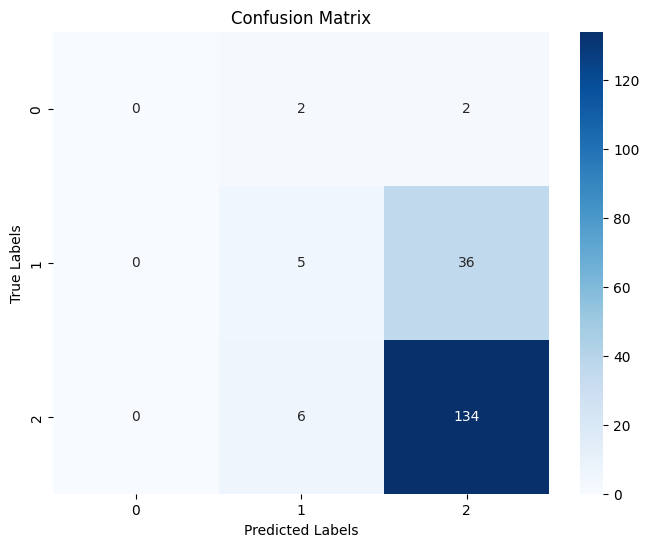

In [139]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='7'></a>
# 7. Model Selection

#### Jump to Table of Contents: [Table of Contents](#toc)

In [140]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm

In [141]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [142]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('RandomForest', RandomForestClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('LightGBM', lightgbm.LGBMClassifier() ))

<a id='8'></a>
# 8. Voting Classifier with Hard Voting

#### Jump to Table of Contents: [Table of Contents](#toc)

In [143]:
VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train, y_train)

y_pred = VC_hard.predict(X_test)
y_train_pred = VC_hard.predict(X_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 430, number of used features: 22
[LightGBM] [Info] Start training from score -3.665890
[LightGBM] [Info] Start training from score -1.520490
[LightGBM] [Info] Start training from score -0.279960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [144]:
training_models += ['Voting Classifier with Hard Voting']

acc_vch = accuracy_score(y_test, y_pred)
tr_acc_vch = accuracy_score(y_train, y_train_pred)

accuracy_list += [acc_vch]
tr_accuracy_list += [tr_acc_vch]

<a id='8.1'></a>
## 8.1 Classification Report

#### Jump to Table of Contents: [Table of Contents](#toc)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.33      0.07      0.12        41
         2.0       0.77      0.97      0.86       140

    accuracy                           0.75       185
   macro avg       0.37      0.35      0.33       185
weighted avg       0.66      0.75      0.68       185



<a id='8.2'></a>
## 8.2 Classification Report

#### Jump to Table of Contents: [Table of Contents](#toc)

Text(0.5, 1.0, 'Confusion Matrix')

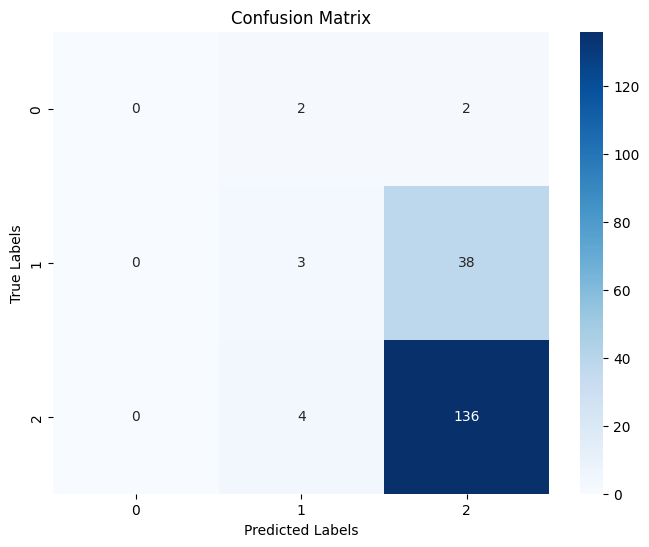

In [146]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

VC_hard_Recall = recall_score(y_test, y_pred, average='weighted')
VC_hard_Precision = precision_score(y_test, y_pred, average='weighted')
VC_hard_f1 = f1_score(y_test, y_pred, average='weighted')
VC_hard_accuracy = accuracy_score(y_test, y_pred)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='8.3'></a>
## 8.3 K-fold cross validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.

#### Jump to Table of Contents: [Table of Contents](#toc)

In [147]:
import warnings
# Suppress specific warnings from LightGBM
warnings.filterwarnings('ignore')

from statistics import stdev
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='accuracy')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 22
[LightGBM] [Info] Start training from score -3.643417
[LightGBM] [Info] Start training from score -1.523154
[LightGBM] [Info] Start training from score -0.279960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [148]:
print('Cross Validation Accuracy scores are: {}'.format(score))
print('Average Cross Validation Accuracy score: ', VC_hard_cv_score)
print('Cross Validation Accuracy standard deviation: ', VC_hard_cv_stdev)

Cross Validation Accuracy scores are: [0.74418605 0.75581395 0.75581395 0.6744186  0.70930233]
Average Cross Validation Accuracy score:  0.727906976744186
Cross Validation Accuracy standard deviation:  0.035460350423202114


In [149]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Accuracy', 'Standard Deviation of CV Accuracy'])
VC_hard_score.insert(0, 'Voting Classifier', 'Hard Voting')
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Accuracy,Standard Deviation of CV Accuracy
0,Hard Voting,0.751351,0.65864,0.67798,0.751351,0.727907,0.03546


<a id='9'></a>
# 9. VotingClassifier with soft voting

#### Jump to Table of Contents: [Table of Contents](#toc)

In [150]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)
y_train_pred = VC_soft.predict(X_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 430, number of used features: 22
[LightGBM] [Info] Start training from score -3.665890
[LightGBM] [Info] Start training from score -1.520490
[LightGBM] [Info] Start training from score -0.279960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [151]:
training_models += ['Voting Classifier with Soft Voting']

acc_vch = accuracy_score(y_test, y_pred)
tr_acc_vch = accuracy_score(y_train, y_train_pred)

accuracy_list += [acc_vch]
tr_accuracy_list += [tr_acc_vch]

<a id='9.1'></a>
## 9.1 Classification report

#### Jump to Table of Contents: [Table of Contents](#toc)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.14      0.02      0.04        41
         2.0       0.76      0.97      0.86       140

    accuracy                           0.74       185
   macro avg       0.30      0.33      0.30       185
weighted avg       0.61      0.74      0.66       185



<a id='9.2'></a>
## 9.2 Confusion Matrix

#### Jump to Table of Contents: [Table of Contents](#toc)

Text(0.5, 1.0, 'Confusion Matrix')

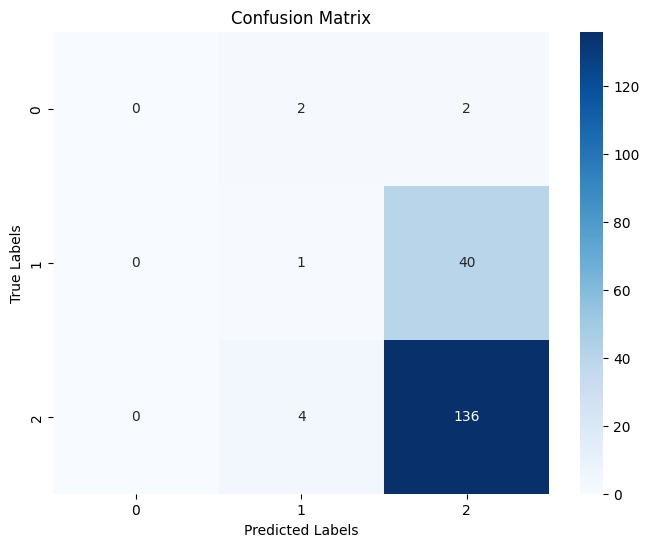

In [153]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

VC_soft_Recall = recall_score(y_test, y_pred, average='weighted')
VC_soft_Precision = precision_score(y_test, y_pred, average='weighted')
VC_soft_f1 = f1_score(y_test, y_pred, average='weighted')
VC_soft_accuracy = accuracy_score(y_test, y_pred)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

<a id='9.3'></a>
## 9.3 K-Fold Cross Validation

#### Jump to Table of Contents: [Table of Contents](#toc)

In [154]:
score2 = cross_val_score(VC_soft, X_train, y_train, cv=5, scoring='accuracy')
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 22
[LightGBM] [Info] Start training from score -3.643417
[LightGBM] [Info] Start training from score -1.523154
[LightGBM] [Info] Start training from score -0.279960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [155]:
print('Cross Validation Accuracy scores are: {}'.format(score2))
print('Average Cross Validation Accuracy score: ', VC_soft_cv_score)
print('Cross Validation Accuracy standard deviation: ', VC_soft_cv_stdev)

Cross Validation Accuracy scores are: [0.72093023 0.74418605 0.74418605 0.72093023 0.73255814]
Average Cross Validation Accuracy score:  0.7325581395348837
Cross Validation Accuracy standard deviation:  0.011627906976744207


In [156]:
ndf2 = [(VC_soft_Recall, VC_soft_Precision, VC_soft_f1, VC_soft_accuracy, VC_soft_cv_score, VC_soft_cv_stdev)]

VC_soft_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Accuracy', 'Standard Deviation of CV Accuracy'])
VC_soft_score.insert(0, 'Voting Classifier', 'Soft Voting')
VC_soft_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Accuracy,Standard Deviation of CV Accuracy
0,Soft Voting,0.740541,0.609856,0.656523,0.740541,0.732558,0.011628


<a id='10'></a>
# 10. Result comparison

#### Jump to Table of Contents: [Table of Contents](#toc)

In [157]:
predictions = pd.concat([VC_hard_score, VC_soft_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Accuracy'], ascending=False)

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Accuracy,Standard Deviation of CV Accuracy
1,Soft Voting,0.740541,0.609856,0.656523,0.740541,0.732558,0.011628
0,Hard Voting,0.751351,0.658640,0.677980,0.751351,0.727907,0.035460


In [158]:
df = {
    "Classifier" : training_models,
    "Training Accuracy Scores" : [round(acc, 6) for acc in tr_accuracy_list],
    "Test Accuracy Scores" : [round(acc, 6) for acc in accuracy_list]
}
df1 = pd.DataFrame(df)
print('Accuracy scores of all individually run models')
print(df1)

Accuracy scores of all individually run models
                            Classifier  Training Accuracy Scores  \
0            Logistic Regression w hpt                  0.755814   
1          Logistic Regression w/o hpt                  0.765116   
2                   Softmax Regression                  0.765116   
3                   RandomForest w hpt                  1.000000   
4                 RandomForest w/o hpt                  1.000000   
5                            SVM w hpt                  0.755814   
6                          SVM w/o hpt                  0.762791   
7                      XGBoost w/o hpt                  1.000000   
8                        XGBoost w hpt                  0.800000   
9                             LightGBM                  1.000000   
10  Voting Classifier with Hard Voting                  0.981395   
11  Voting Classifier with Soft Voting                  1.000000   

    Test Accuracy Scores  
0               0.756757  
1             